# NY Medicaid Correlation Analysis


## This script contains the following points:
1. Import libraries
2. Import NY_county3_total.csv dataset
3. Verify the dataset
4. Correlation Analysis

### 1. Importing Libraries

In [4]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import visualization libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Importing NY State dataset

The dataset NY_county3_total.csv was created by combining data from the USDA FOOD Access Research Atlas and NY State Medicaid data, inclusive of NYS counties with total populations of 100k or less, Total Low Income populations in those counties, and average monthly beneficiaries.

NY State Medicaid data prepared by NYS Department of Health, Fiscal Management Group, FSSU, Data Management @ https://www.health.ny.gov/statistics/health_care/medicaid/quarterly/ssd/.


In [5]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert'

In [6]:
ny_county = pd.read_csv(os.path.join(path, '02_Data', 'cleaned_data', 'NY_county3_total.csv'), index_col=False)

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 3. Verify the dataset

In [8]:
ny_county.head(60)

,Unnamed: 0,County,Total_Population,Sum of Total_Low_Income,Average Monthly Beneficiaries,Population_flag
0,1,Allegany,48946,16451,8696,Low_Population
1,3,Cattaraugus,80317,29283,15125,Low_Population
2,4,Cayuga,80026,22934,13683,Low_Population
3,6,Chemung,88830,28180,17994,Low_Population
4,7,Chenango,50477,17390,9844,Low_Population
5,8,Clinton,82128,23298,14817,Low_Population
6,9,Columbia,63096,16729,9871,Low_Population
7,10,Cortland,49336,14994,9248,Low_Population
8,11,Delaware,47980,15031,8159,Low_Population
9,14,Essex,39370,10275,5949,Low_Population


In [9]:
ny_county.tail()

,Unnamed: 0,County,Total_Population,Sum of Total_Low_Income,Average Monthly Beneficiaries,Population_flag
29,53,Warren,65707,16625,10173,Low_Population
30,54,Washington,63216,18769,10674,Low_Population
31,55,Wayne,93772,25888,15073,Low_Population
32,57,Wyoming,42155,10737,5391,Low_Population
33,58,Yates,25348,8044,4027,Low_Population


In [10]:
ny_county.shape

(34, 6)

In [11]:
ny_county.columns

Index(['Unnamed: 0', 'County', 'Total_Population', 'Sum of Total_Low_Income',
       'Average Monthly Beneficiaries', 'Population_flag'],
      dtype='object')

In [12]:
ny_county.dtypes

Unnamed: 0                        int64
County                           object
Total_Population                  int64
Sum of Total_Low_Income           int64
Average Monthly Beneficiaries     int64
Population_flag                  object
dtype: object

In [14]:
ny_county2 = ny_county.drop(columns = ['Unnamed: 0'])

In [15]:
ny_county2.columns

Index(['County', 'Total_Population', 'Sum of Total_Low_Income',
       'Average Monthly Beneficiaries', 'Population_flag'],
      dtype='object')

### 4. Correlation Analyses

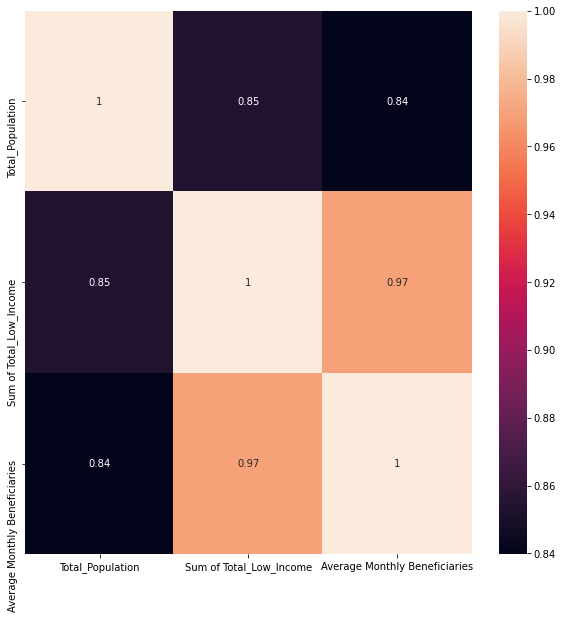

In [14]:
# using matplotlib to create a subplot
f,ax = plt.subplots(figsize=(10,10))

# using seaborn to create a heatmap of the correlation matrix and subplots of all NY counties
corr1 = sns.heatmap(ny_county2.corr(), annot = True, ax = ax)

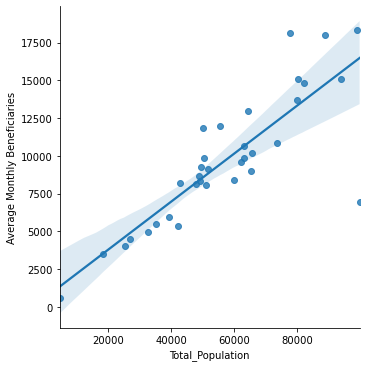

In [15]:
# creating a scatterplot for the "Average Monthly Income" and "Total Population" columns in seaborn for all NY counties
scat_1 = sns.lmplot(x = 'Total_Population', y = 'Average Monthly Beneficiaries', data = ny_county2)

In [16]:
scat_1.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatter_NY1.png'))

In [126]:
scat_2.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatter_NY2.png'))

I want to look at the relationship between the population of counties with 100k or less and average monthly beneficiaries of Medicaid

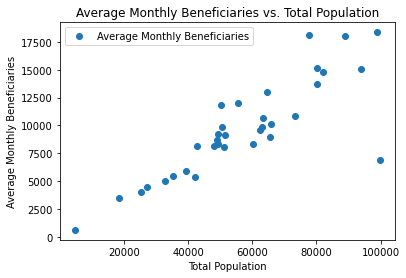

In [17]:
ny_county2.plot(x = 'Total_Population', y='Average Monthly Beneficiaries',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Monthly Beneficiaries vs. Total Population')  
plt.xlabel('Total Population')  
plt.ylabel('Average Monthly Beneficiaries')  
plt.show()

In [18]:
X = ny_county2['Total_Population'].values.reshape(-1,1)
y = ny_county2['Average Monthly Beneficiaries'].values.reshape(-1,1)

In [19]:
X

array([[48946],
       [80317],
       [80026],
       [88830],
       [50477],
       [82128],
       [63096],
       [49336],
       [47980],
       [39370],
       [51599],
       [55531],
       [60079],
       [49221],
       [ 4836],
       [64519],
       [27087],
       [65393],
       [73442],
       [50219],
       [42883],
       [62259],
       [99710],
       [32749],
       [18343],
       [35251],
       [98990],
       [77547],
       [51125],
       [65707],
       [63216],
       [93772],
       [42155],
       [25348]], dtype=int64)

In [20]:
y

array([[ 8696],
       [15125],
       [13683],
       [17994],
       [ 9844],
       [14817],
       [ 9871],
       [ 9248],
       [ 8159],
       [ 5949],
       [ 9143],
       [12008],
       [ 8381],
       [ 8354],
       [  620],
       [13002],
       [ 4498],
       [ 8971],
       [10879],
       [11868],
       [ 8195],
       [ 9578],
       [ 6940],
       [ 4971],
       [ 3474],
       [ 5483],
       [18376],
       [18121],
       [ 8062],
       [10173],
       [10674],
       [15073],
       [ 5391],
       [ 4027]], dtype=int64)

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

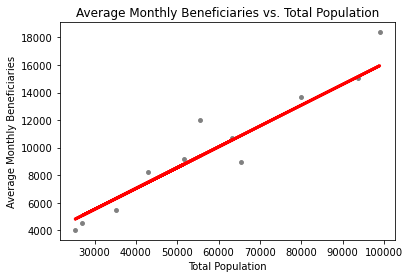

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Monthly Beneficiaries vs. Total Population')
plot_test.xlabel('Total Population')
plot_test.ylabel('Average Monthly Beneficiaries')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15111173]]
Mean squared error:  1738375.8055227364
R2 score:  0.9068781567200445


In [28]:
y_predicted

array([[ 9378.79604153],
       [ 7467.5349273 ],
       [ 6314.25023218],
       [10869.0598863 ],
       [13080.27777723],
       [15945.96055478],
       [15157.45956695],
       [ 5080.57409867],
       [ 8784.62473372],
       [ 4817.79080664],
       [10540.08965814]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12008,9378.796042
1,8195,7467.534927
2,5483,6314.250232
3,8971,10869.059886
4,13683,13080.277777
5,18376,15945.960555
6,15073,15157.459567
7,4498,5080.574099
8,9143,8784.624734
9,4027,4817.790807


In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15111173]]
Mean squared error:  7083534.170986787
R2 score:  0.5984107990348365


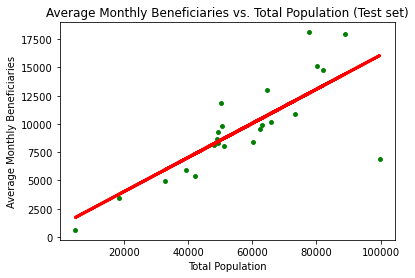

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Average Monthly Beneficiaries vs. Total Population (Test set)')
plot_test.xlabel('Total Population')
plot_test.ylabel('Average Monthly Beneficiaries')
plot_test.show()